# Data Preprocessing

Most of Machine Learning algorithms make assumptions on your data, for example that the scales are comparable or simply they work only on numerical data. This implies that we need to pre-process the data. 
User oriented applications, such as BigML, do that automatically. However, when you use a language such as Python or R, you have to do it manually and decide for each attribute. 

In the Machine Learning process (see figure below) pre-processing is the first step after loading and examining your data. 

There are 4 basic processes that we will treat separatelty. Depending on the algorithm that we will use, we'll need to apply all of them or only some:

        1) Rescale data.
        2) Standarize data.
        3) Normalize data. 
        4) Binarize data. 
        
Before the pre-processing there are three(3) important steps:

        a) Load your dataset
        b) Examine it and get rid of everything that doesn't apply.
        c) Split the dataset into the input and output variables.
        
You will observe that scikit-learn provides two equivalent ways. First you can use the fit() function to prepare your data and later the transform() function. Or you can use the combined fit-and-transform. 

In this exercise we will use one of the traditional Machine Learning dataset, the Pima Indians diabetes dataset.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, <b>Outcome</b>. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<blockquote>
        <ul style="list-style-type:square;">
            <li>Pregnancies</li> 
            <li>Glucose</li>
            <li>BloodPressure</li>
            <li>SkinThickness</li>
            <li>Insulin</li>
            <li>BMI</li>
            <li>DiabetesPedigreeFunction</li>
            <li>Age</li>
            <li>Outcome</li>
        </ul>
</blockquote>

In [1]:
# Load the Pima indians dataset and separate input and output components 

import numpy as np
import pandas as pd

filename="pima-indians-diabetes.data.csv"
names=["pregnancies", "glucose", "pressure", "skin", "insulin", "bmi", "pedi", "age", "outcome"]
p_indians=pd.read_csv(filename, names=names)
p_indians.head()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# First we separate into input and output components
array = p_indians.values
X = array[:,0:8]
y = array[:,8]
X
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


<h1> Rescale Data </h1>

It is very common that the attributes have very different scales. Therefore, many machine learning algorithms benefit from rescalling the attributes to all have the same scale. Normally between 0 and 1. This process is commonly called normalization. 

This is important with optimization algorithms that use gradient descent. Also with algorithms, like regressions, that weight inputs like regression or neural networks. It is also needed when the the algorithms use distances such as the case of k-means or k-nn(K-Nearest Neighbors). 

For rescaling your data, you use the <b> MinMaxScaler </b> class.

In [3]:
# Rescale data between 0 and 1

p_indians.head()

from sklearn.preprocessing import MinMaxScaler

# Scale between 0 and 1

scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(X)

rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

<h1>Standarize Data </h1>

Standarization is a technique that assumes a Gaussians distribution but different means and standard deviations.
Transforming them to a Gaussian of mean 0 and standard deviation of 1. 

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with 
rescaled data, such as linear regression, logistic regression or LDA (linear discriminant analysis).

For standarizing you use the <b>StandardScaler</b> class. 

In [4]:
# Standardize data (0 mean, 1 stdev)

from sklearn.preprocessing import StandardScaler

p_indians.head()

scaler = StandardScaler().fit(X)
stdized_x = scaler.transform(X)

stdized_x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

<h1>Normalize Data </h1>

Normalization works with observations (rows) instead of attributes (columns). 

The idea here is to have a length 1 for each observation (a vector of length 1 in linear algebra).

It is useful in algorithms that weigth input values as a whole, such is the case of Neural Networks
and also distance algorithms such as K-nn (Nearest Neighbors)

For normalization you use the <b>Normalizer</b> class. 

In [5]:
from sklearn.preprocessing import Normalizer

p_indians.head()

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

normalizedX

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

<h1>Binarize Data </h1>

Binarize consist in transforming data using a binary threshold; all values above are marked as 1
and all values below as zero. 

Sometimes you want to transform probabilities into crisp values. Many times it is used in feature engineering
when you add a new feature. 

For binarization you use the <b>Binarizer</b> class. 

In [6]:
from sklearn.preprocessing import Binarizer

p_indians.head()

binarizer=Binarizer(threshold=0.0).fit(X)
binaryX=binarizer.transform(X)

binaryX[:10,0:8]

array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1.]])

# Feature Selection

The element that has the biggest impact in the quality of your model is data features. You can only include in your model the attributes that you have and if they are not relevant, partially relevant or don't caputre the causality relationships behind the model, or introduce other relationships that correspond to other causes different from the ones that you want to investigate, then you'll have a poor model. 

Selecting the relevant features that add to your model is therefore of the utmost importance. 

In this notebook we will deal with four approaches:

        1) Univaritate Selection.
        2) Recursive feature elimination.
        3) PCA - Principal Component Analysis.
        4) Estimating feature importance.

Feature selection is a process where you select those features in your data that contribute most to the variable of interest. Irrelevant features decrease the accuracy of many models because you try to adjust on noise, this is particularly important in the case of linear models, such as linear and logistic regressions, where all features are always taken into account. Three are the main benefits of feature selection:

        1) Reduces overfitting. Less redundant data implies less decisions made on noise. 
        2) Improves accuracy. Less misleading data results in a more accurate model. 
        3) Reduces training time. Less data implies faster training. 
        
Scikitlearn has a nice and short article on feature selection where you can learn more https://scikit-learn.org/stable/modules/feature_selection.html

Again we will use the Pima Indians onset of diabetes dataset. 

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from numpy import set_printoptions
set_printoptions(precision=3)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

C:\Users\duart\AppData\Local\conda\conda\envs\testEnv\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h1>Univariate Selection </h1>

One approach is to use statistical tests for example the Pearson Chi-Squared $\chi^2$ is commonly used to select the most significant features. 

We will use the <b> SelectKBest </b> class in scikit-learn.


In [8]:
# Univariate selection using Chi-squared 
set_printoptions(precision=3)
p_indians.head()

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

# feature selection (we select the 4 best)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,y)
print("Scores")

fit.scores_

print("The 4 attributes with the highest scores are: glucose, insulin, bmi and age ")
print()

features=fit.transform(X)
features[0:5,:]

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Scores


array([ 111.52 , 1411.887,   17.605,   53.108, 2175.565,  127.669,
          5.393,  181.304])

The 4 attributes with the highest scores are: glucose, insulin, bmi and age 



array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

<h1>Recursive Feature Elimination</h1>

This is a very intuitive approach. It consist on recursively removing attributes and building a model with those atrributes remaining. It uses the model accuracy to identify which atrributes or combination of attributes contribute the most. 

We will use it with a logistic regression, but the choice of algorithm doesn't matter too much as long as your are consistent. 

Recursive Feature Elimination uses the <b>RFE </b> class. 

In [9]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

p_indians.head()

#Logistic regression
model = LogisticRegression(solver='liblinear')

rfe = RFE(model, 3) #  we want to find the 3 top features
fit = rfe.fit(X, y)

print(f'Number of features {fit.n_features_:d}')
print(f'Selected features {fit.support_}')
print(f'Ranking of features {fit.ranking_}')
print()
print("Top features seem to be pregnancies, bmi, and pedi(Diabetes Pedigree Function)")

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Number of features 3
Selected features [ True False False False False  True  True False]
Ranking of features [1 2 3 5 6 1 1 4]

Top features seem to be pregnancies, bmi, and pedi(Diabetes Pedigree Function)


<h1>Principal Component Analysis</h1>

Principal Component Analysis is a data reduction technique using linear algebra. The idea here is to "compress" several dimensions into pricipal components. 

One problem of PCA is the explainability. Once you compressed the attributes into principal components you can no longer to refer them individually establishing causality links or relationships. 

A property of PCA is that you can choose the number of dimensions or principal components. In our example we will select 3 principal components. 

For Principal Component Analysis you use the <b>PCA</b> class. 

In [10]:
from sklearn.decomposition import PCA

p_indians.head()

#PCA
pca = PCA(n_components=3)
pca_fit = pca.fit(X)

print(f"Explained variance: {pca_fit.explained_variance_ratio_}")
print()

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("Principal Components have little resemblance to the source data attributes")
print()
print(pca_fit.components_)

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Explained variance: [0.889 0.062 0.026]

Principal Components have little resemblance to the source data attributes

[[-0.002  0.098  0.016  0.061  0.993  0.014  0.001 -0.004]
 [-0.023 -0.972 -0.142  0.058  0.095 -0.047 -0.001 -0.140]
 [-0.022  0.143 -0.922 -0.307  0.021 -0.132 -0.001 -0.125]]


<h1>Feature Importance </h1>

One of the added features of tree based algorithms is that they can be used to estimate the importance of each feature and use it to refine the model to different levels depending on where we want to situate ourselves in the tension between explainability and accuracy. 

In this example we are going to use the ExtraTreesClassifier, but the technique is commonly used in all tree algoritms. 

For this example of assessing feature importance with trees we will use the <b>ExtraTreesClassifier</b> class. 

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

p_indians.head()

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)

print(model.feature_importances_)

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[ 0.111  0.224  0.099  0.084  0.076  0.141  0.121  0.144]


<h1>Basic Classification Algorithms</h1>

Here we review six of the most well-known classification algorithms. 

Two linear:

<ul>
    <li>Logistic Regression.</li>
    <li>Linear Discriminant Analysis.</li>
</ul>
and four non-linear:
<ul>
    <li>k-nn - k-Nearest Neighbors.</li>
    <li>Naive Bayes.</li>
    <li>CART - Classification and Regression Trees.</li>
    <li>SVM - Support Vector Machines.</li>
</ul>

Then we will address the simple and common question of <b><i>What algorithms should I use in this dataset?</b></i>

In all cases we will use a dataset that we are familiar with, the Pima Indians dataset, with a 10-fold cross-validation. 

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [13]:
# Create the DataFrames for plotting
resall=pd.DataFrame()
res_w1=pd.DataFrame()
res_w2=pd.DataFrame()
res_w3=pd.DataFrame()

# Logistic Regression

It is probably the best known and the oldest. We are also pretty familiar with it !

Logistic regression assumes a Gaussian distribution for the numeric input variables and can solve binary and multi-class classification problems. 

We will use the <b>LogisticRegression</b> class.

In [15]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

kfold=KFold(n_splits=10, random_state=7, shuffle = True)

model=LogisticRegression(solver="liblinear")

results=cross_val_score(model, X, y, cv=kfold)

print(f'Logistic Regression - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, stdized_x, y, cv=kfold)

print(f'Logistic Regression (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, rescaledX, y, cv=kfold)

print(f'Logistic Regression ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

# if the range of variables is large scaling doesn't matter in a log regression 
# but if you are not sure if they are (or you don't want to check ... ) just try ! 

res_w1["Res"]=results
res_w1["Type"]="log"

# -1..1 because it is standardized

res_w2["Res"]=results_scl
res_w2["Type"]="log -1..1"

# 0..1 because it is scaled 

res_w3["Res"]=results_minmax
res_w3["Type"]="log 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

Logistic Regression - Accuracy 77.086% std 5.090501
Logistic Regression (-1..1) - Accuracy 77.216% std 4.760338
Logistic Regression ( 0..1) - Accuracy 76.176% std 4.055062


# LDA - Linear Discriminant Analysis

Linear Discriminant Analysis or discriminant analysis is a generalization of Fisher's linear discriminant, originally developed by Ronald Fisher in 1936. Although it is different from ANOVA (Analysis of variance), they are closely related. 

LDA also assumes a Gaussian distribution of the numerical input variables and can be used for binary or multi-class classification. 

We will use the <b>LinearDiscriminantAnalysis</b> class.

In [17]:
# LDA - Linear Discriminant Analysis 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

kfold=KFold(n_splits=10, random_state=7, shuffle = True)

model=LinearDiscriminantAnalysis()

results=cross_val_score(model, X, y, cv=kfold)

print(f'LDA Linear Discriminant Analysis - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, stdized_x, y, cv=kfold)

print(f'LDA (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, rescaledX, y, cv=kfold)

print(f'LDA ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="LDA"

res_w2["Res"]=results_scl
res_w2["Type"]="LDA -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="LDA 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

LDA Linear Discriminant Analysis - Accuracy 76.697% std 4.796563
LDA (-1..1) - Accuracy 76.697% std 4.796563
LDA ( 0..1) - Accuracy 76.697% std 4.796563


# k-nn k-Nearest Neighbors

k-Nearerst Neighbors is a non-linear machine learning algorithm that uses distance metrics to find the most similar k-elements, taking the meand outcome of the neighbors as the prediction.

One interesting advantage of this algorithm is that we can choose a different metric for calculating the distance. The default metric is Minkowski, equivalent to euclidean (with p=2). It can be easily transformed to Mnahattan distance with p=1. 

For constructing a knn model you must use the <b>KNeighorsClassifier</b> class.

In [19]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier

kfold=KFold(n_splits=10, random_state=7, shuffle = True)

model=KNeighborsClassifier()

results=cross_val_score(model, X, y, cv=kfold)

print(f'KNN - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, stdized_x, y, cv=kfold)

print(f'KNN (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, rescaledX, y, cv=kfold)

print(f'KNN ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

# scaling in knn is necessary ...

res_w1["Res"]=results
res_w1["Type"]="KNN"

res_w2["Res"]=results_scl
res_w2["Type"]="KNN -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="KNN 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

KNN - Accuracy 71.099% std 5.079151
KNN (-1..1) - Accuracy 73.966% std 4.752278
KNN ( 0..1) - Accuracy 73.835% std 4.555707


# Naive Bayes

In Naive Bayes class labels are represented by a vector of features and each feature is considered independent of the others (the naive part of the name comes from this assumption). Probabilities are calculated following the bayesian approach. 

In spite of its oversimplified assumptions, the algorithm works quite well in complex, real world situations. The algorithm is particularly usefull with small samples of data. 

For Naive Bayes we will use the <b>GaussianNB</b> class. 

In [21]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

kfold=KFold(n_splits=10, random_state=7, shuffle = True)

model=GaussianNB()

results=cross_val_score(model, X, y, cv=kfold)

print(f'Naive Bayes - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, stdized_x, y, cv=kfold)

print(f'Naive Bayes (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, rescaledX, y, cv=kfold)

print(f'Naive Bayes ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="NB"

res_w2["Res"]=results_scl
res_w2["Type"]="NB -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="NB 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

Naive Bayes - Accuracy 75.914% std 3.895993
Naive Bayes (-1..1) - Accuracy 75.914% std 3.895993
Naive Bayes ( 0..1) - Accuracy 75.914% std 3.895993


# CART - Classification and Regression Trees

Cart builds a binary tree from the data where the splits are chosen greedly evaluating all the attributes in order to minimize a cost function (Gini index or entropy typically).

They are the base for random forests and more sophisticated algorithms. 

For CART we will use the <b>DecisionTreeClassifier</b> class.

In [23]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed, shuffle = True)

model=DecisionTreeClassifier(class_weight="balanced", random_state=seed)

results=cross_val_score(model, X, y, cv=kfold)

print(f'Decision Tree - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, stdized_x, y, cv=kfold)

print(f'Decision Tree (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, rescaledX, y, cv=kfold)

print(f'Decision Tree ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="DT"

res_w2["Res"]=results_scl
res_w2["Type"]="DT -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="DT 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

Decision Tree - Accuracy 69.933% std 5.447732
Decision Tree (-1..1) - Accuracy 69.674% std 5.580434
Decision Tree ( 0..1) - Accuracy 70.063% std 5.497085


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

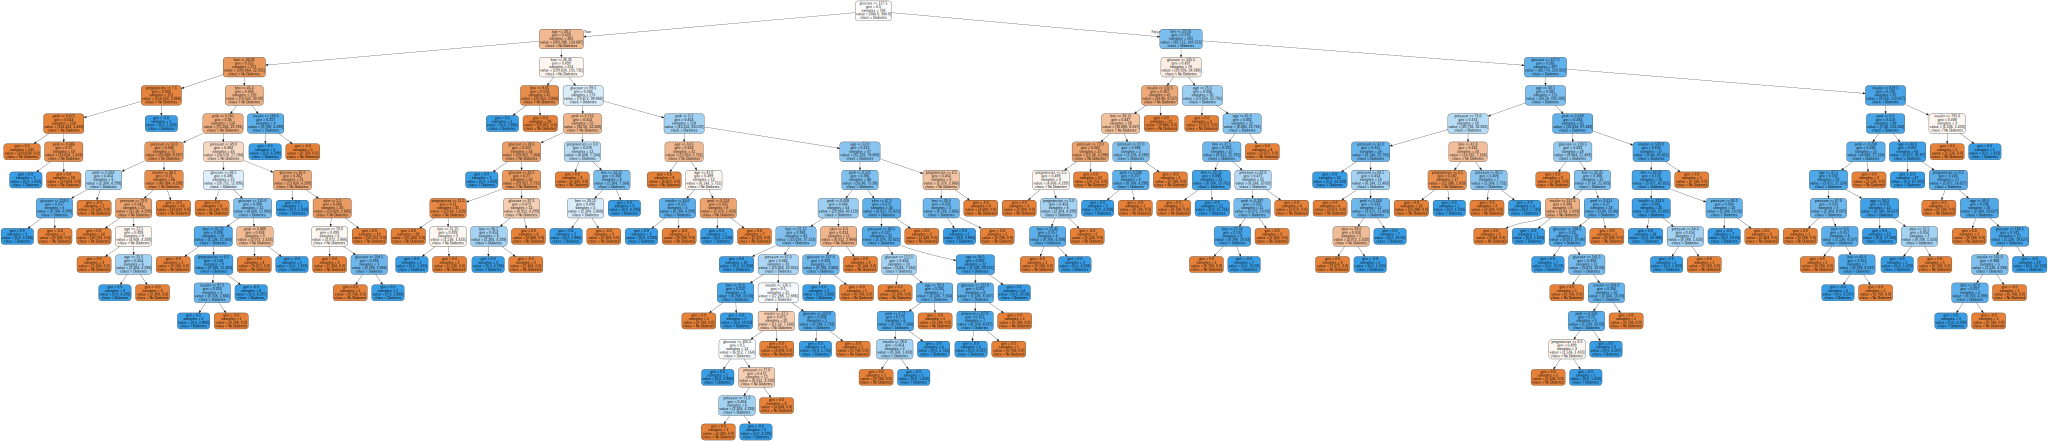

In [24]:
# Displaying a tree
# ! pip install graphviz

from IPython.display import HTML

from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from ipywidgets import interactive


style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

model=DecisionTreeClassifier(class_weight="balanced", random_state=seed)
model.fit(X,y)

graph=Source(tree.export_graphviz(model,
        out_file=None,      
        feature_names=p_indians.columns[0:-1],
        class_names=['No Diabetes','Diabetes'],
        filled=True,
        rounded=True))

display(SVG(graph.pipe(format="svg")))

# Support Vector Machines

Support vector machines seeks a line that separates best two classes. The data instances that are closest to this line are, better separating the classes, are called support vectors. 

Support Vector Machines have the advantage that you can change the kernel function to use. Radial basis function is used by default, a pretty powerful one. 

You can construct a SVM model with the <b>SVC</b> class.

In [26]:
# SVM - Support Vector Machines

from sklearn.svm import SVC

kfold=KFold(n_splits=10, random_state=7, shuffle = True)

model=SVC(gamma="scale")

results=cross_val_score(model, X, y, cv=kfold)

print(f'Support Vector Machines - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, stdized_x, y, cv=kfold)

print(f'SVM (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, rescaledX, y, cv=kfold)

print(f'SVM ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

# the importance of scaling depends on the kernel used

res_w1["Res"]=results
res_w1["Type"]="SVM"

res_w2["Res"]=results_scl
res_w2["Type"]="SVM -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="SVM 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

Support Vector Machines - Accuracy 76.046% std 3.471187
SVM (-1..1) - Accuracy 75.654% std 5.622202
SVM ( 0..1) - Accuracy 76.962% std 6.530781


# Algorithm Comparison

<Figure size 1080x648 with 0 Axes>

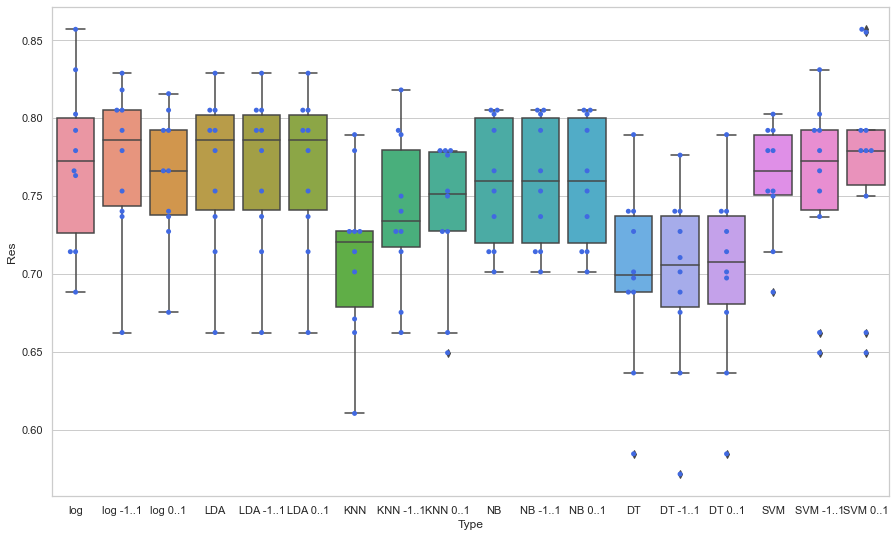

In [27]:
# Now let's compare them all 

plt.figure(figsize=(15,9))

sns.boxplot(data=resall, x="Type", y="Res")

sns.swarmplot(data=resall, x="Type", y="Res", color="royalblue")